# Diving into the data of Fantasy Premier League

### Importing all the necessary packages and libraries

In [2]:
import requests
import pandas as pd
import numpy as np
import json
from IPython.display import display, Image
import pandas as pd
import fuzzywuzzy
import warnings
import matplotlib.patches as patches

In [3]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

All of the data available on FPL site can be accessed via an API that they provide. Let's see how it looks like

In [4]:
# Make a request to GET the data from the FPL API
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
response = requests.get(url)

# Convert JSON data to a python object
data = json.loads(response.text)

data.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

Each key of the dictionary is responsible for storing some kind of data for FPL. Let's dive into some of them

## Exploring 'elements' dataset - dataset storing data for all players

In [5]:
# Create pandas DataFrame from JSON player data
player_dataset = pd.DataFrame.from_dict(data['elements'])

display(player_dataset.shape)
display(player_dataset.head())
player_dataset.columns

(730, 88)

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text,expected_goals_per_90,saves_per_90,expected_assists_per_90,expected_goal_involvements_per_90,expected_goals_conceded_per_90,goals_conceded_per_90,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90
0,0.0,0.0,232223,0,0,-1,1,0,4,0.0,0.0,0,Folarin,0.0,1,False,Transferred to Monaco,2023-08-31T08:55:15.272751Z,44,232223.jpg,0.0,Balogun,0.2,False,None,u,1,3,0,10024,0,57094,701,0.0,0.0,Balogun,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,575,56,564,59,553,57,579,57,NaN,,NaN,,NaN,,0.00,0.0,0.00,0.00,0.00,0.00,528,90,528,55,583,60,301,49,0.00,0.00
1,NaN,NaN,58822,0,0,-1,1,0,2,1.0,0.5,0,Cédric,0.0,2,False,,None,39,58822.jpg,0.0,Alves Soares,0.4,False,None,a,1,3,0,21261,2186,23637,1246,0.0,0.0,Cédric,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,437,156,417,152,394,141,441,155,NaN,,NaN,,NaN,,0.00,0.0,0.00,0.00,0.00,0.00,699,221,364,117,444,154,244,94,0.00,0.00
2,100.0,100.0,153256,0,0,-1,1,0,3,1.0,0.5,0,Mohamed,0.0,3,False,,2023-08-11T13:00:06.079379Z,44,153256.jpg,0.0,Elneny,0.1,False,None,a,1,3,0,7595,522,11747,448,0.0,0.0,M.Elneny,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,558,210,547,211,535,207,562,214,NaN,,NaN,,NaN,,0.00,0.0,0.00,0.00,0.00,0.00,495,276,505,183,565,215,424,136,0.00,0.00
3,100.0,100.0,438098,0,0,-1,1,0,3,1.3,0.8,0,Fábio,0.3,4,False,,2023-09-29T10:30:07.948136Z,54,438098.jpg,3.2,Ferreira Vieira,0.1,False,None,a,1,3,16,10002,128,13130,726,0.1,3.0,Fábio Vieira,185,0,3,1,2,0,0,0,0,0,0,0,45,45.6,56.5,58.0,15.9,2,0.41,0.32,0.73,1.41,281,119,182,109,149,88,239,110,4.0,,NaN,,NaN,,0.20,0.0,0.16,0.36,0.69,0.97,130,84,351,165,115,51,379,120,0.97,0.49
4,100.0,100.0,226597,0,0,-3,3,0,2,6.0,5.5,1,Gabriel,5.0,5,False,,2023-09-30T23:00:07.672676Z,47,226597.jpg,3.1,dos Santos Magalhães,13.6,False,None,a,1,3,25,504701,97540,2073337,25156,1.1,5.3,Gabriel,564,0,0,3,5,0,0,0,1,0,0,2,120,108.2,11.8,25.0,14.6,6,0.20,0.05,0.25,6.11,155,58,340,119,240,69,254,83,NaN,,NaN,,NaN,,0.03,0.0,0.01,0.04,0.98,0.80,334,41,33,10,119,37,29,10,0.96,0.48


Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_con

### Exploring players dataset columns based on comparison with FPL page

We can see that there are loots of columns so let's do a subset of them! To understand all of them I took 3 players and compared the values in the dataset with the one on FPL page.

In [6]:
player_dataset.loc[(player_dataset['first_name'].isin(['Bukayo','Mohamed', 'Erling']))& (player_dataset['second_name'].isin(['Saka','Salah', 'Haaland'])),]

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text,expected_goals_per_90,saves_per_90,expected_assists_per_90,expected_goal_involvements_per_90,expected_goals_conceded_per_90,goals_conceded_per_90,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90
17,100.0,75.0,223340,0,0,0,0,2,3,5.7,3.9,5,Bukayo,4.7,19,True,,2023-10-03T22:30:07.474324Z,85,223340.jpg,7.2,Saka,48.2,False,None,a,1,3,58,1661256,248804,2756212,71588,0.6,6.8,Saka,703,4,4,3,8,0,0,0,1,0,0,8,215,302.2,337.8,296.0,93.5,8,3.98,2.62,6.60,7.23,7,4,5,4,13,8,3,3,1.0,,NaN,,1.0,,0.51,0.0,0.34,0.85,0.93,1.02,8,6,47,22,4,3,3,1,1.02,0.38
380,NaN,NaN,118748,1,-1,3,-3,2,3,11.2,11.2,16,Mohamed,10.7,308,True,,None,128,118748.jpg,8.3,Salah,40.3,False,None,a,11,14,75,2157607,307783,954739,8720,0.8,5.9,Salah,774,7,4,2,8,0,0,1,1,0,0,11,232,366.4,263.0,418.0,104.8,9,6.63,2.86,9.49,10.55,1,1,16,12,2,1,1,1,NaN,,NaN,,2.0,,0.77,0.0,0.33,1.10,1.23,0.93,2,1,2,1,1,1,4,2,1.05,0.23
450,NaN,NaN,223094,0,0,0,0,2,4,4.5,5.0,8,Erling,4.0,355,True,,None,140,223094.jpg,7.0,Haaland,85.6,False,None,a,13,43,63,569720,13290,829282,196956,0.3,4.5,Haaland,799,9,1,3,7,0,0,1,0,0,0,8,251,350.4,124.9,450.0,92.7,9,8.11,0.42,8.53,6.35,2,1,65,4,1,1,4,1,NaN,,NaN,,1.0,,0.91,0.0,0.05,0.96,0.72,0.79,1,1,65,8,5,2,1,1,1.01,0.34


Now let's create a dictionary of relevant columns with keys as the column names and values as a short description of them! Just in case I forget what some of them mean.

In [7]:
#based on this the relevant columns are
relevant_columns_description={
    'cost_change_start':'price change since start',
    'dreamteam_count':'nr of times in dreamteam',
    'element_type':'position in game',
    'event_points':'points in last gameweek',
    'first_name':'first name',
    'form':'form',
    'in_dreamteam':'whether in current dreamteam',
    'now_cost':'current price *10',
    'points_per_game': 'points per game',
    'second_name': 'second name',
    'selected_by_percent': 'selected by percent',
    'team':'team nr based on alphabetical order',
    #'team_code':'team code ???',
    'total_points': 'total points',
    'transfers_in': 'total transfers in',
    'transfers_in_event': 'transfers in this gameweek',
    'transfers_out': 'total transfers out',
    'transfers_out_event': 'transfers out this gameweek',
    'value_form':'form / value rounded',
    'value_season':'total points / value rounded',
    'minutes':'minutes',
    'goals_scored': 'goals scored',
    'assists': 'assists',
    'clean_sheets': 'clean sheets',
    'goals_conceded': 'goals conceded',
    'own_goals': 'own goals',
    'penalties_saved': 'penalties saved',
    'penalties_missed': 'penalties missed',
    'yellow_cards': 'yellow cards',
    'red_cards': 'red cards',
    'saves' : 'saves',
    'bonus':'total bonus points (fpl points)',
    'bps':'total bonus points',
    'influence':'total influence metric',
    'creativity':'total creativity metric',
    'threat':'total threat metric',
    'ict_index':'total ict index',
    'starts':'starts',
    'expected_goals':'total expected goals',
    'expected_assists':'total expected assists',
    'expected_goal_involvements':'total expected goal involvements',
    'expected_goals_conceded':'total expected goals conceded',
    'influence_rank':'rank for influence across all positions',
    #'influence_rank_type':'something with position???',
    'creativity_rank':'rank for creativity across all positions',
    #'creativity_rank_type':'something with position???',
    'threat_rank':'rank for threat across all positions',
    #'threat_rank_type':'something with position???',
    'ict_index_rank':'rank for ict index across all positions',
    #'ict_index_rank_type':'something with position???',
    'corners_and_indirect_freekicks_order':'corners and indirect freekicks order, not complete',
    'direct_freekicks_order':'direct freekicks order, not complete',
    'penalties_order':'penalties order, not complete',
    'expected_goals_per_90':'expected goals per_90',
    'saves_per_90':'saves per 90',
    'expected_assists_per_90':'expected assists per 90',
    'expected_goal_involvements_per_90':'expected goal involvements per 90',
    'expected_goals_conceded_per_90':'expected goals conceded per 90',
    'goals_conceded_per_90':'goals conceded per 90',
    'now_cost_rank':'rank for price across all positions',
    #'now_cost_rank_type':'something with position???',
    'form_rank':'rank for form across all positions',
    #'form_rank_type':'something with position???',
    'points_per_game_rank':'rank for points across all positions',
    #'points_per_game_rank_type':'something with position???',
    'selected_rank':'rank for selected across all positions',
    #'selected_rank_type':'something with position???',
    #'starts_per_90':'???',
    'clean_sheets_per_90':'amount of minutes on pitch with clean sheet / amount of minutes on pitch',
    'id':'id'
}

Now let's be sure that we didn't omit any important columns and quickly dive into the rest of them.

In [8]:
print(len(relevant_columns_description.keys()), ' - # of columns relevant and already analyzed')

remaining_columns = list(set(player_dataset.columns).difference(relevant_columns_description.keys()))
print(len(remaining_columns), '- all looks fine')

for el in remaining_columns:
    print(player_dataset[el].value_counts(dropna=False).head())
#quickly analyzing all these columns i guess they dont make sense so can be dropped

60  - # of columns relevant and already analyzed
28 - all looks fine
chance_of_playing_this_round
NaN      303
0.0      219
100.0    164
75.0      22
25.0      11
Name: count, dtype: int64
now_cost_rank_type
47    4
29    4
21    4
32    4
37    4
Name: count, dtype: int64
status
a    477
u    146
i     69
d     30
s      7
Name: count, dtype: int64
form_rank_type
55    4
13    4
34    4
40    4
17    4
Name: count, dtype: int64
direct_freekicks_text
    730
Name: count, dtype: int64
creativity_rank_type
59    4
38    4
7     4
26    4
14    4
Name: count, dtype: int64
cost_change_start_fall
 0    319
 1    224
 2    107
 3     36
-2     13
Name: count, dtype: int64
cost_change_event_fall
 0    690
 1     31
-1      9
Name: count, dtype: int64
special
False    730
Name: count, dtype: int64
cost_change_event
 0    690
-1     31
 1      9
Name: count, dtype: int64
threat_rank_type
57    4
75    4
61    4
5     4
9     4
Name: count, dtype: int64
ep_next
0.0     292
0.5      49
-0.5     4

### Removing the unnecessary columns for players dataset

In [9]:
player_dataset.drop(remaining_columns, axis=1, inplace=True)

## Exploring the 'teams' dataset - dataset storing data for all the teams

In [10]:
teams_dataset = pd.DataFrame.from_dict(data['teams'])

display(teams_dataset.head())
display(teams_dataset.columns)
display(teams_dataset.shape)

#- every row for a club
#- should merge on id

,code,draw,form,id,loss,name,played,points,position,short_name,strength,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,4,None,False,0,1230,1285,1250,1250,1210,1320,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,3,None,False,0,1115,1175,1130,1190,1100,1160,2
2,91,0,None,3,0,Bournemouth,0,0,0,BOU,3,None,False,0,1060,1095,1050,1100,1060,1090,127
3,94,0,None,4,0,Brentford,0,0,0,BRE,3,None,False,0,1125,1205,1120,1220,1130,1190,130
4,36,0,None,5,0,Brighton,0,0,0,BHA,3,None,False,0,1165,1210,1120,1200,1210,1240,131


Index(['code', 'draw', 'form', 'id', 'loss', 'name', 'played', 'points',
       'position', 'short_name', 'strength', 'team_division', 'unavailable',
       'win', 'strength_overall_home', 'strength_overall_away',
       'strength_attack_home', 'strength_attack_away', 'strength_defence_home',
       'strength_defence_away', 'pulse_id'],
      dtype='object')

(20, 21)

Once again we can do a subset for only the interesting columns.

In [11]:
relevant_columns_description_teams = ['id', 'name', 'short_name', 'strength', 'strength_overall_home', 'strength_overall_away', \
                                      'strength_attack_home', 'strength_attack_away', 'strength_defence_home', 'strength_defence_away']

#subset for relevant columns
teams_dataset = teams_dataset[relevant_columns_description_teams]

teams_dataset.head()

,id,name,short_name,strength,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away
0,1,Arsenal,ARS,4,1230,1285,1250,1250,1210,1320
1,2,Aston Villa,AVL,3,1115,1175,1130,1190,1100,1160
2,3,Bournemouth,BOU,3,1060,1095,1050,1100,1060,1090
3,4,Brentford,BRE,3,1125,1205,1120,1220,1130,1190
4,5,Brighton,BHA,3,1165,1210,1120,1200,1210,1240


## Exploring the 'events' dataset - dataset storing data for every gameweek of FPL game

In [12]:
events_dataset = pd.DataFrame.from_dict(data['events'])

display(events_dataset.head())
display(events_dataset.columns)
display(events_dataset.shape)
#each row for each gameweek

,id,name,deadline_time,average_entry_score,finished,data_checked,highest_scoring_entry,deadline_time_epoch,deadline_time_game_offset,highest_score,is_previous,is_current,is_next,cup_leagues_created,h2h_ko_matches_created,chip_plays,most_selected,most_transferred_in,top_element,top_element_info,transfers_made,most_captained,most_vice_captained
0,1,Gameweek 1,2023-08-11T17:30:00Z,64,True,True,3383750.0,1691775000,0,127.0,False,False,False,False,False,"[{'chip_name': 'bboost', 'num_played': 163222}...",355.0,1.0,395.0,"{'id': 395, 'points': 14}",0,355.0,19.0
1,2,Gameweek 2,2023-08-18T17:15:00Z,44,True,True,3338487.0,1692378900,0,120.0,False,False,False,True,True,"[{'chip_name': 'bboost', 'num_played': 126778}...",355.0,195.0,108.0,"{'id': 108, 'points': 16}",13130353,355.0,19.0
2,3,Gameweek 3,2023-08-25T17:30:00Z,44,True,True,9368956.0,1692984600,0,128.0,False,False,False,True,True,"[{'chip_name': 'bboost', 'num_played': 124110}...",355.0,108.0,216.0,"{'id': 216, 'points': 19}",17619532,355.0,19.0
3,4,Gameweek 4,2023-09-01T17:30:00Z,72,True,True,4354697.0,1693589400,0,148.0,False,False,False,True,True,"[{'chip_name': 'bboost', 'num_played': 109196}...",355.0,216.0,516.0,"{'id': 516, 'points': 20}",16035365,355.0,19.0
4,5,Gameweek 5,2023-09-16T10:00:00Z,44,True,True,6211182.0,1694858400,0,102.0,False,False,False,True,True,"[{'chip_name': 'bboost', 'num_played': 96469},...",355.0,516.0,344.0,"{'id': 344, 'points': 13}",14363988,355.0,19.0


Index(['id', 'name', 'deadline_time', 'average_entry_score', 'finished',
       'data_checked', 'highest_scoring_entry', 'deadline_time_epoch',
       'deadline_time_game_offset', 'highest_score', 'is_previous',
       'is_current', 'is_next', 'cup_leagues_created',
       'h2h_ko_matches_created', 'chip_plays', 'most_selected',
       'most_transferred_in', 'top_element', 'top_element_info',
       'transfers_made', 'most_captained', 'most_vice_captained'],
      dtype='object')

(38, 23)

Interesting dataset, will be used for some analysis for sure.

## Exploring rest of the datasets

In [13]:
element_stats_dataset = pd.DataFrame.from_dict(data['element_stats'])
display(element_stats_dataset.head())

element_types_dataset = pd.DataFrame.from_dict(data['element_types'])
display(element_types_dataset.head())

phases_dataset = pd.DataFrame.from_dict(data['phases'])
phases_dataset.head()

#the rest of the elements dont work but actually we dont need them, not sure we need this ones either

,label,name
0,Minutes played,minutes
1,Goals scored,goals_scored
2,Assists,assists
3,Clean sheets,clean_sheets
4,Goals conceded,goals_conceded


,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked,element_count
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,1,1,True,[12],85
1,2,Defenders,DEF,Defender,DEF,5,3,5,False,[],237
2,3,Midfielders,MID,Midfielder,MID,5,2,5,False,[],314
3,4,Forwards,FWD,Forward,FWD,3,1,3,False,[],94


,id,name,start_event,stop_event
0,1,Overall,1,38
1,2,August,1,3
2,3,September,4,7
3,4,October,8,10
4,5,November,11,13


From here only the 'element_types' dataset looks interesting and we will use it later for sure!

## Joining the datasets

Since the data is a little bit split into separate dataframes, let's merge it together so we have all information in one place!

In [14]:
# join player positions
final_dataset = player_dataset.merge(
    teams_dataset,
    left_on='team',
    right_on='id',
    suffixes =['_player','_team']
).merge(
    element_types_dataset,
    left_on='element_type',
    right_on='id'
)

# rename columns
final_dataset = final_dataset.rename(
    columns={'name':'team_name', 'singular_name':'position_name', 'id': 'id_position'}
)

final_dataset = final_dataset.drop(columns=['element_type', 'sub_positions_locked', 'element_count', 'ui_shirt_specific', 'plural_name', 'plural_name_short'])

## Get gameweek history & season history for each player

Since we already have all players in one dataframe, let’s get data on a per-player basis!

In [15]:
base_url = 'https://fantasy.premierleague.com/api/'



def get_player_id(player):
    '''get player id for a given player based on full name'''

    from fuzzywuzzy import fuzz, process

    first_name, second_name = player.split()
    first_name = process.extractOne(first_name, player_dataset['first_name'])[0]
    second_name = process.extractOne(second_name, player_dataset['second_name'])[0]

    player_id = final_dataset.loc[(final_dataset['first_name'].isin([first_name])) & (final_dataset['second_name'].isin([second_name])), 'id_player'].values[0]

    return player_id





def get_gameweek_history(player):
    '''get all gameweek info for a given player based on full name'''

    player_id = get_player_id(player)

    r = requests.get(
            base_url + 'element-summary/' + str(player_id) + '/').json()
    
    df = pd.json_normalize(r['history'])
    
    return df





def get_season_history(player):
    '''get all past season info for a given player based on full name'''

    player_id = get_player_id(player)

    r = requests.get(
            base_url + 'element-summary/' + str(player_id) + '/').json()
    
    df = pd.json_normalize(r['history_past'])
    
    return df


In [16]:
get_season_history('Matty Cash')

,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded
0,2020/21,199796,50,50,89,2373,0,2,11,35,0,0,0,6,1,0,8,468,520.8,352.9,110.0,98.7,0,0.00,0.00,0.00,0.00
1,2021/22,199796,50,53,147,3377,4,3,13,50,0,0,0,8,0,0,11,623,754.8,432.1,534.0,172.1,0,0.00,0.00,0.00,0.00
2,2022/23,199796,50,46,57,1817,0,2,4,29,0,0,0,4,0,0,3,311,303.0,178.3,67.0,54.9,20,0.20,0.95,1.15,27.14


# First plot - sum all points gathered for each team this season

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
#this is in alphabetical order
premier_league_colors_list = [
    ("Arsenal", "#EF0107"),
    ("Aston Villa", "#770A0A"),
    ("Bournemouth", "#DA020E"),
    ("Brentford", "#F20603"),
    ("Brighton", "#0057B8"),
    ("Burnley", "#A52A2A"),
    ("Chelsea", "#034694"),
    ("Crystal Palace", "#E03A3E"),
    ("Everton", "#003399"),
    ("Fulham", "#000000"),
    ("Liverpool", "#C8102E"),
    ("Luton", "#FFA41C"),
    ("Man City", "#6CAEE0"),
    ("Man Utd", "#DA020E"),
    ("Newcastle", "#000000"),
    ("Nott'm Forest", "#DC143C"),
    ("Sheffield Utd", "#EE2737"),
    ("Spurs", "#001C58"),
    ("West Ham", "#7A263A"),
    ("Wolves", "#FFD100"),
]

premier_league_colors = [tup[1] for tup in premier_league_colors_list]



position_colors = {
    "Goalkeeper": "#F1C40F",
    "Defender": "#3498DB",
    "Midfielder": "#27AE60",
    "Forward": "#FF5733"
}



In [19]:
for club in premier_league_colors_list:
    for row in final_dataset['team_name']:
        if club[0] == row:
            final_dataset.loc[final_dataset['team_name'] == row, 'color'] = club[1]

In [20]:
def barplot_fplpoints_per_club(save = False):
    '''creates barplot displaying sum of fpl points gained per club'''
    
    sns.set_style("darkgrid")
    plt.figure(figsize=(20, 8))

    fpl_points_per_club = final_dataset.groupby('team_name')['total_points'].sum()

    sns.barplot(x=fpl_points_per_club.index, y=fpl_points_per_club.values, palette = premier_league_colors)
    
    plt.xticks(rotation=45, fontsize=12)
    plt.xlabel('Teams', fontsize=15)
    plt.ylabel('Points attained all season', fontsize=15)
    plt.title('Points attained all season for each club', fontsize=18)
    plt.text(0.99, 0.97, "u/DataDrivenDribbler", fontsize=10, ha='right', va='bottom', transform=plt.gca().transAxes, alpha=0.5)

    if save == True:
        plt.savefig("c:\\Users\\Asus\\Desktop\\GitHub\\fpl_analysis\\figures\\barplot_fplpoints_per_club")
    else:
        plt.show()

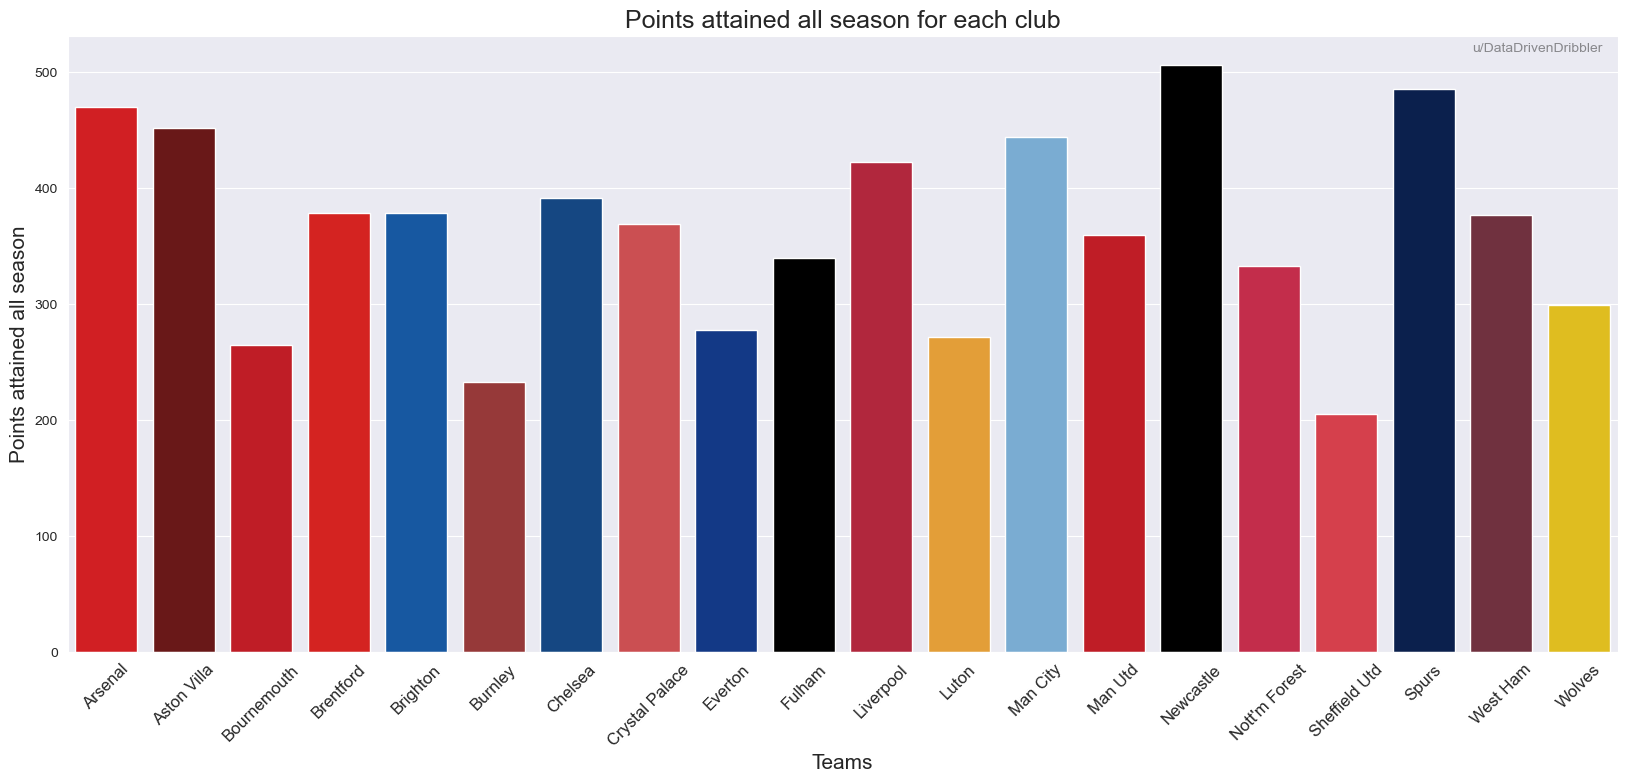

In [21]:
barplot_fplpoints_per_club()

In [22]:
def barplot_fplpoints_per_position(save = False):
    '''creates barplot displaying sum and mean of fpl points gained per position'''
    
    sns.set_style("darkgrid")
    plt.figure(figsize=(20, 8))

    played_already = final_dataset[final_dataset['minutes'] >= 1]
    df = played_already.groupby('position_name')['total_points'].agg(['sum', 'mean', 'count'])
    df = df.reindex(['Goalkeeper', 'Defender', 'Midfielder', 'Forward'])
    
    sns.barplot(x=df.index, y=df['sum'], palette = list(position_colors.values()))

    for i, mean in enumerate(df['mean']):
        plt.annotate(f'Mean for player: {mean:.2f}', (i, mean), ha='center', va='bottom', fontsize=15)

    for i, count in enumerate(df['count']):
        plt.annotate(f'Count of players: {count}', (i, count),xytext=(i-0.3, 2000), fontsize=15)
    
    plt.xticks(rotation=45, fontsize=15)
    plt.xlabel('Positions', fontsize=18)
    plt.ylabel('Points attained all season', fontsize=18)
    plt.title('Points attained all season per position', fontsize=20)
    plt.text(0.99, 0.97, "u/DataDrivenDribbler", fontsize=10, ha='right', va='bottom', transform=plt.gca().transAxes, alpha=0.5)
    if save == True:
        plt.savefig("c:\\Users\\Asus\\Desktop\\GitHub\\fpl_analysis\\figures\\barplot_fplpoints_per_position.png")
    else:
        plt.show()

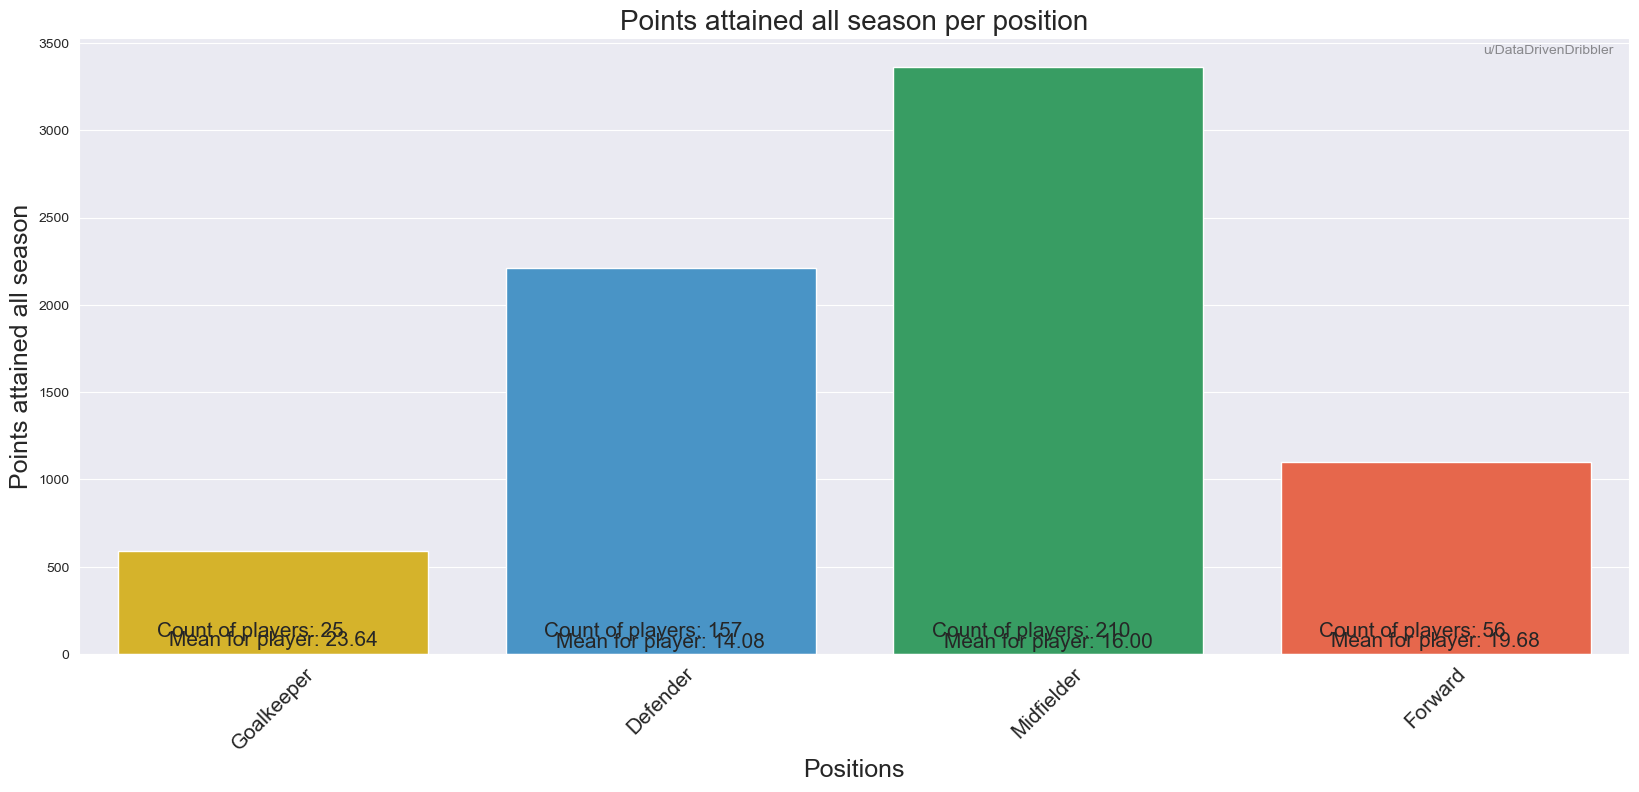

In [23]:
barplot_fplpoints_per_position()

In [24]:
def scatterplot_Goals_vs_xG(save=False):
    '''creates scatterplot displaying goals vs expected goals for each club'''
    
    sns.set_style("white")
    plt.figure(figsize=(20, 8))

    final_dataset['expected_goals'] = final_dataset['expected_goals'].astype(float)
    
    xG_per_club = final_dataset.groupby('team_name')['expected_goals'].sum()
    G_per_club = final_dataset.groupby('team_name')['goals_scored'].sum()
    fpl_points_per_club = final_dataset.groupby('team_name')['total_points'].sum()

    sns.scatterplot(x=G_per_club.values, y=xG_per_club.values, s = 200, c = premier_league_colors)

    for index, club in enumerate(G_per_club.index):
        plt.text(G_per_club[index]-0.3, xG_per_club[index]+0.25, club, fontsize = 12)

    x_values = np.linspace(0, max(max(G_per_club.values),max(xG_per_club.values))+1)
    plt.plot(x_values, x_values, color='gray', linestyle='--')


    overperform_area = [(0, 0), (max(G_per_club.values)+1, 0), (max(G_per_club.values)+1, max(G_per_club.values)+1)]
    overperform_triangle = patches.Polygon(overperform_area, closed=True, facecolor='lightgreen', alpha=0.2)

    underperform_area = [(0, 0), (0, max(G_per_club.values)+1), (max(G_per_club.values)+1, max(G_per_club.values)+1)]
    underperform_triangle = patches.Polygon(underperform_area, closed=True, facecolor='lightcoral', alpha=0.2)
    
    ax = plt.gca()
    ax.add_patch(overperform_triangle)
    ax.add_patch(underperform_triangle)

    plt.text(1, max(xG_per_club.values)-1, 'UNDERPERFORMING', fontsize = 20, c = 'salmon')
    plt.text(max(G_per_club.values)-3,1, 'OVERPERFORMING', fontsize = 20, c= 'mediumseagreen')


    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Goals', fontsize=18)
    plt.ylabel('Expected Goals', fontsize=18)
    plt.title('Goals vs Expected Goals (without OG)', fontsize=20)
    plt.xlim(0, max(G_per_club.values)+1)
    plt.ylim(0, max(xG_per_club.values)+1)
    plt.annotate("u/DataDrivenDribbler", xy=(max(G_per_club.values)-0.1, 0.05), fontsize=10, alpha=0.5)
    if save == True:
        plt.savefig("c:\\Users\\Asus\\Desktop\\GitHub\\fpl_analysis\\figures\\scatterplot_Goals_vs_xG.png")
    else:
        plt.show()

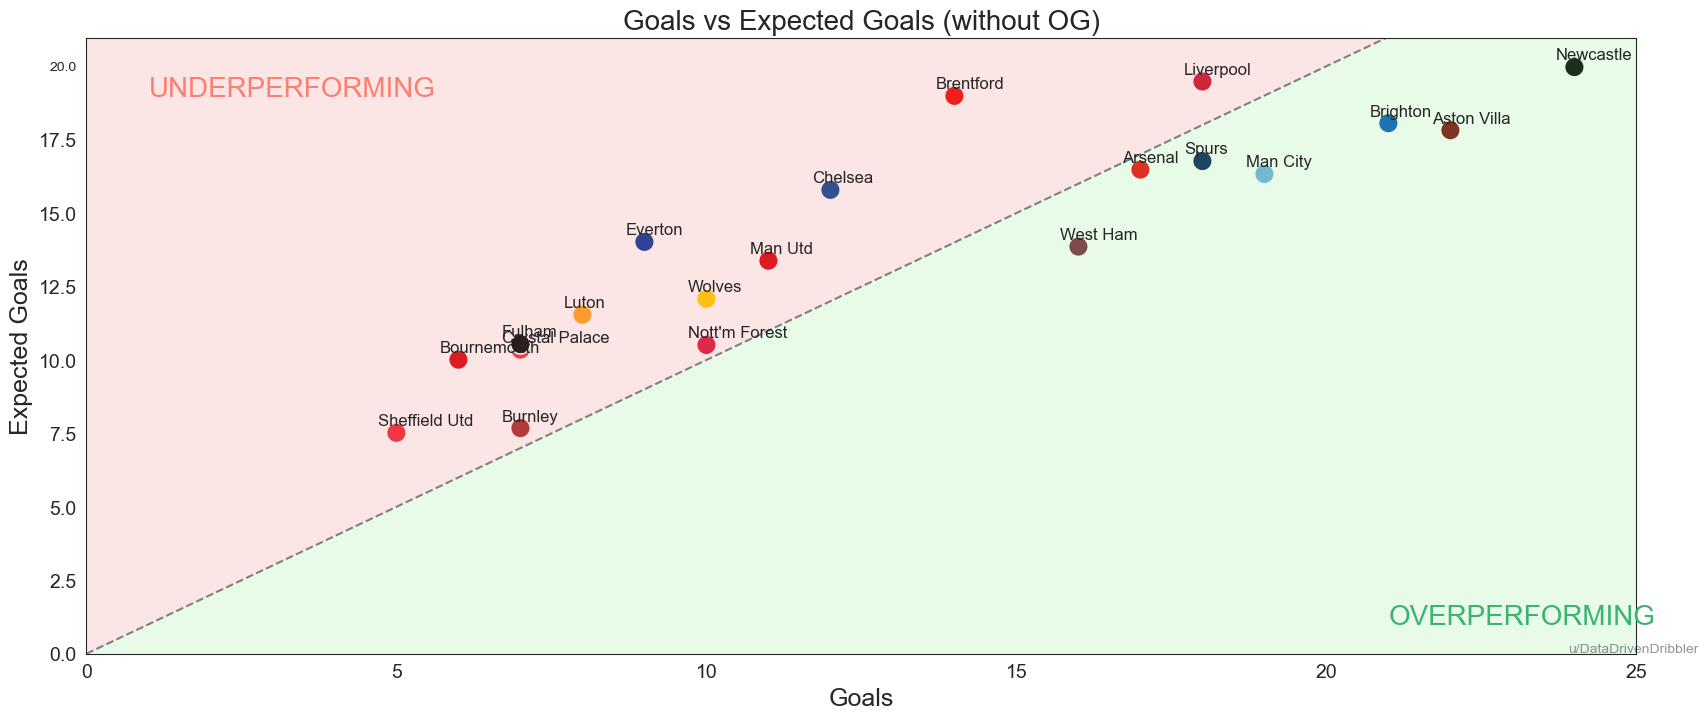

In [25]:
scatterplot_Goals_vs_xG()

In [26]:
def scatterplot_Goals_Against_vs_xGA(save=False):
    '''creates scatterplot displaying goals against vs expected goals against for each club'''
    
    sns.set_style("white")
    plt.figure(figsize=(20, 8))
 
    gk_df = final_dataset[(final_dataset['position_name'] == 'Goalkeeper') & (final_dataset['minutes'] >=1 )]
    gk_df['expected_goals_conceded'] = gk_df['expected_goals_conceded'].astype(float)
    xGa_per_club = gk_df.groupby('team_name')['expected_goals_conceded'].sum()
    Ga_per_club = gk_df.groupby('team_name')['goals_conceded'].sum()

    sns.scatterplot(x=Ga_per_club.values, y=xGa_per_club.values, s = 200, c = premier_league_colors)

    for index, club in enumerate(Ga_per_club.index):
        plt.text(Ga_per_club[index]-0.3, xGa_per_club[index]+0.25, club, fontsize = 12)

    x_values = np.linspace(0, max(max(Ga_per_club.values),max(xGa_per_club.values))+1)
    plt.plot(x_values, x_values, color='gray', linestyle='--')


    underperform_area = [(0, 0), (max(Ga_per_club.values)+1, 0), (max(Ga_per_club.values)+1, max(Ga_per_club.values)+1)]
    underperform_triangle = patches.Polygon(underperform_area, closed=True, facecolor='lightcoral', alpha=0.2)

    overperform_area = [(0, 0), (0, max(xGa_per_club.values)+1), (max(xGa_per_club.values)+1, max(xGa_per_club.values)+1)]
    overperform_triangle = patches.Polygon(overperform_area, closed=True, facecolor='lightgreen', alpha=0.2)
    
    ax = plt.gca()
    ax.add_patch(overperform_triangle)
    ax.add_patch(underperform_triangle)

    plt.text(1, max(xGa_per_club.values)-1, 'OVERPERFORMING', fontsize = 20, c = 'mediumseagreen')
    plt.text(max(Ga_per_club.values)-3,1, 'UNDERPERFORMING', fontsize = 20, c= 'salmon')


    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Goals Against', fontsize=18)
    plt.ylabel('Expected Goals Against', fontsize=18)
    plt.title('Goals Against vs Expected Goals Against', fontsize=20)
    plt.xlim(0, max(Ga_per_club.values)+1)
    plt.ylim(0, max(xGa_per_club.values)+1)
    plt.annotate("u/DataDrivenDribbler", xy=(max(Ga_per_club.values)-0.1, 0.05), fontsize=10, alpha=0.5)
    if save == True:
        plt.savefig("c:\\Users\\Asus\\Desktop\\GitHub\\fpl_analysis\\figures\\scatterplot_Goals_Against_vs_xGA.png")
    else:
        plt.show()

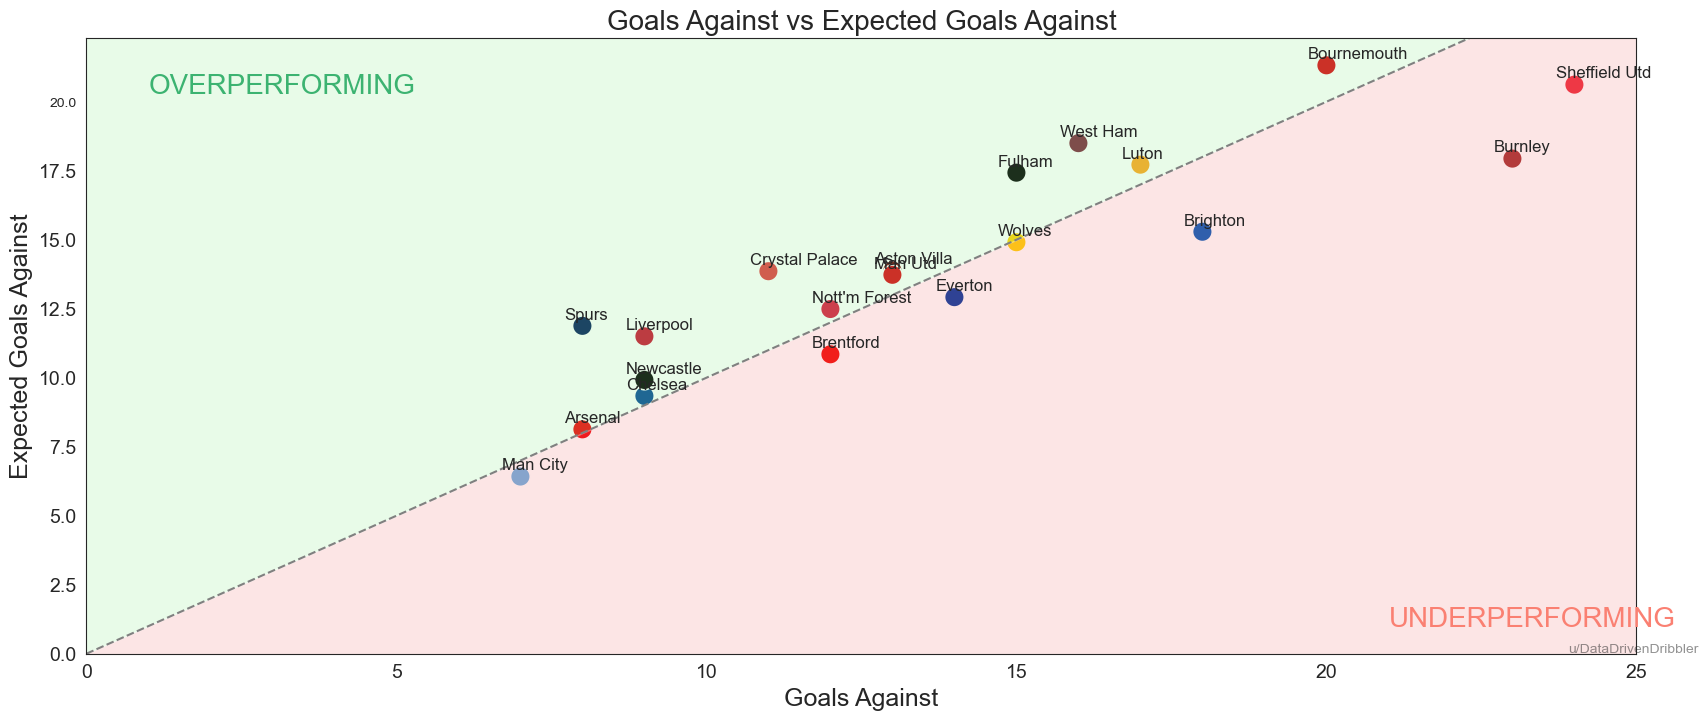

In [27]:
scatterplot_Goals_Against_vs_xGA(save = True)

In [28]:
def barplot_fplpoints_split(save = False):
    '''creates barplot displaying split of fpl points for the season'''
    
    sns.set_style("darkgrid")
    sns.color_palette("coolwarm", as_cmap=True)

    plt.figure(figsize=(20, 8))

    total_pts = final_dataset['total_points'].sum()

    #positive points
    goal_pts=sum(final_dataset.groupby('position_name')['goals_scored'].sum()*[6,4,6,5])
    assist_pts = final_dataset['assists'].sum()*3
    penalty_save_pts = final_dataset[final_dataset['position_name'] == 'Goalkeeper']['penalties_saved'].sum()*5
    bps_pts = final_dataset['bonus'].sum()
    cs_pts = sum(final_dataset.groupby('position_name')['clean_sheets'].sum()*[4,0,4,1])
    start_pts = final_dataset['starts'].sum()*2
    saves_pts = round(final_dataset['saves'].sum()/3)
    sub_pts = len(final_dataset[(final_dataset['starts']==0) & (final_dataset['minutes'] > 0)])

    #negative points
    penalty_miss_pts = final_dataset['penalties_missed'].sum()*(-2)
    yc_pts = final_dataset['yellow_cards'].sum()*(-1)
    rc_pts = final_dataset['red_cards'].sum()*(-3)
    og_pts = final_dataset['own_goals'].sum()*(-2)

    small_pts = penalty_save_pts + penalty_miss_pts + og_pts

    points = [goal_pts, assist_pts, bps_pts, start_pts, sub_pts, cs_pts, saves_pts, yc_pts, rc_pts, small_pts]
    points = sorted(points, reverse = True)
    categories = ['> 60 minutes', 'Goals', 'Clean Sheets', 'Assists', 'Bonus points', '< 60 minutes', 'Saves', 'Penalty saves \n Penalty misses \n Own goals', 'Red cards', 'Yellow cards']
    percentages = [round(value / total_pts , 4) * 100 for value in points]

    sns.barplot(x=categories, y=percentages, palette = 'coolwarm')

    for i, pct in enumerate(percentages):
        plt.annotate(f'{pct:.2f}%', (i, pct), ha='center', va='bottom', fontsize=15)

    plt.ylim(min(percentages) - 1, max(percentages) + 1)
    plt.xticks(fontsize=13)
    plt.yticks([i for i in range(-10,51,10)], fontsize=13)
    plt.xlabel('Actions', fontsize=20)
    plt.ylabel('Percentage (%)', fontsize=20)
    plt.title('(Approximate) Split of total FPL points per action', fontsize=24)
    plt.text(0.99, 0.97, "u/DataDrivenDribbler", fontsize=10, ha='right', va='bottom', transform=plt.gca().transAxes, alpha=0.5)

    if save == True:
        plt.savefig("c:\\Users\\Asus\\Desktop\\GitHub\\fpl_analysis\\figures\\barplot_fplpoints_split.png")
    else:
        plt.show()


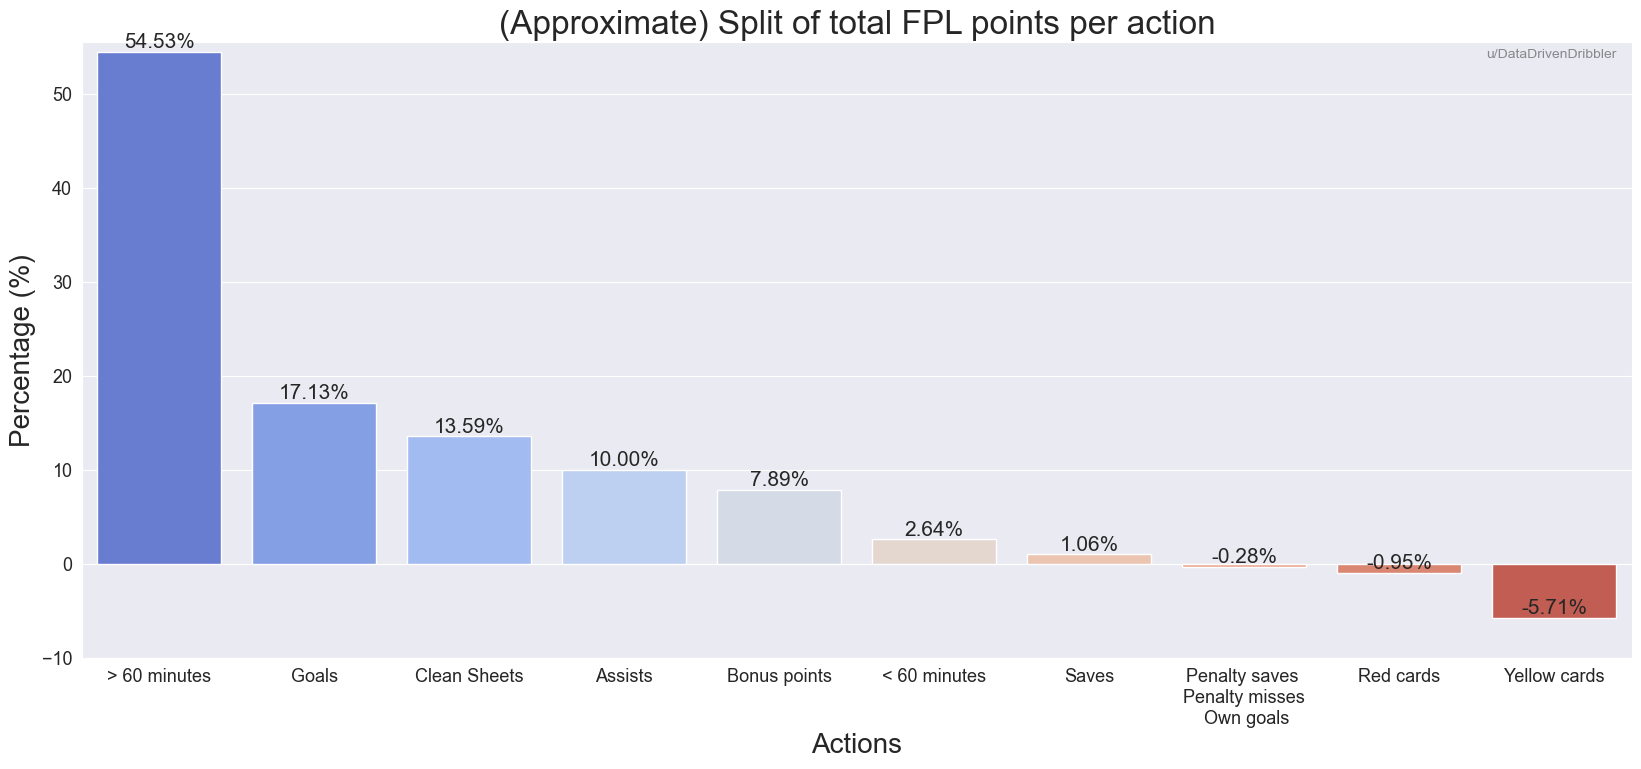

In [29]:
barplot_fplpoints_split(save = True)

In [30]:
def scatterplot_price_vs_points(save=False):
    '''creates scatterplot displaying price vs points for each club and each position'''
    
    sns.set_style("white")
    plt.figure(figsize=(20, 8))

    final_dataset['now_cost'] = final_dataset['now_cost']/10

    sns.scatterplot(x='now_cost', y='total_points', size = 'position_name', data = final_dataset)
    plt.show()

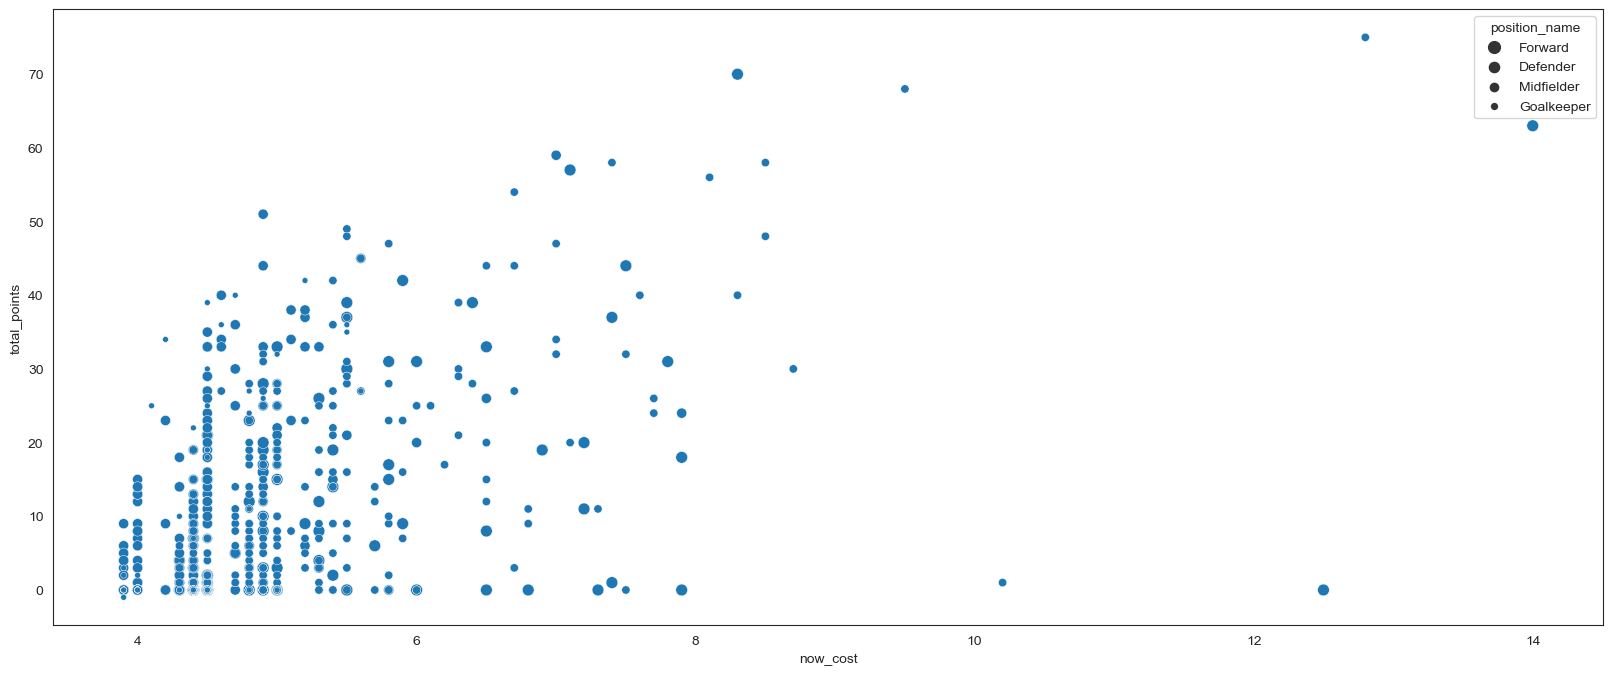

In [31]:
scatterplot_price_vs_points()

In [ ]:
#improve the plot

In [ ]:
#can do something with gw history or previous season history